In [1]:
import os

import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import cartopy.crs as ccrs
import cartopy.feature as cfeature

from xarray.coding.cftime_offsets import MonthEnd



In [2]:
home_dir = os.path.expanduser('~')
file_path = os.path.join(home_dir, 'Code/star-struck/data/download.grib')

In [3]:
def load_dataset(filename):
    """
    Load a dataset from a given file path.

    Parameters:
    - filename (str): The path to the dataset file.

    Returns:
    - xarray.Dataset: The loaded dataset with temperature in Celsius.
    """

    home_dir = os.path.expanduser('~')
    file_path = os.path.join(home_dir, 'Code/star-struck/data/', filename)

    ds = xr.open_dataset(file_path, engine='cfgrib')
    
    # convert Kelvin to Celcius
    ds['t2m'] -= 273.15

    return ds

In [6]:
ds = load_dataset(file_path)
print(ds.step)

<xarray.DataArray 'step' (step: 24)>
array([ 3600000000000,  7200000000000, 10800000000000, 14400000000000,
       18000000000000, 21600000000000, 25200000000000, 28800000000000,
       32400000000000, 36000000000000, 39600000000000, 43200000000000,
       46800000000000, 50400000000000, 54000000000000, 57600000000000,
       61200000000000, 64800000000000, 68400000000000, 72000000000000,
       75600000000000, 79200000000000, 82800000000000, 86400000000000],
      dtype='timedelta64[ns]')
Coordinates:
    number   int64 ...
  * step     (step) timedelta64[ns] 01:00:00 02:00:00 ... 1 days 00:00:00
    surface  float64 ...
Attributes:
    long_name:      time since forecast_reference_time
    standard_name:  forecast_period


/Users/dimly/Code/star-struck/env/lib/python3.11/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/Users/dimly/Code/star-struck/env/lib/python3.11/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_cultural/ne_10m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


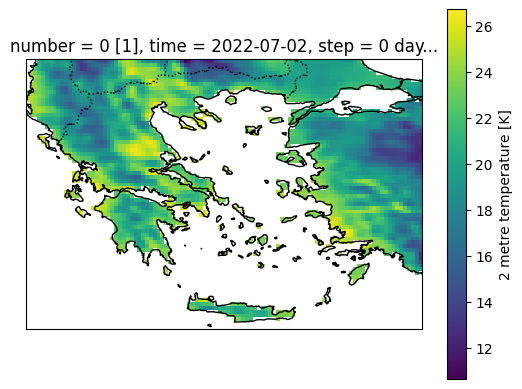

In [8]:
data_to_plot = ds.t2m.sel(time='2022-07-02', step='3600000000000')

fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})
data_to_plot.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='viridis')

ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')

plt.show()